In [100]:
from matplotlib import pyplot as plt
import numpy as np

n:             125233
median:  6.583930e+03
mean:    6.582501e+03
max:     6.766916e+03
min:     6.448031e+03
std:     2.846169e+01


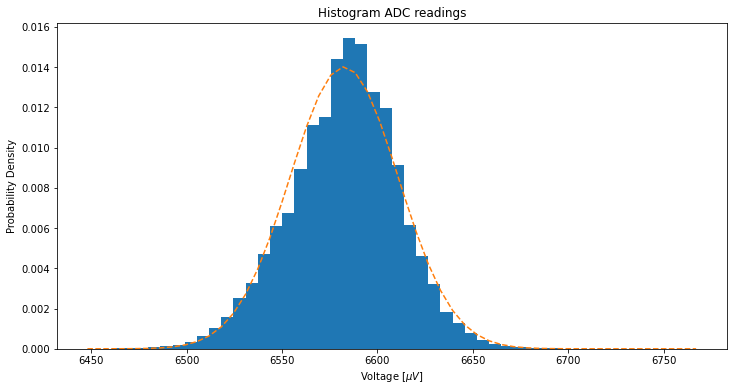

In [101]:
data = np.loadtxt("/tmp/adc_data.csv") * 1000000# reading in volts

print('n:{:>19d}'.format(len(data)))
print('median: {: .6e}'.format(np.median(data)))
print('mean:   {: .6e}'.format(np.mean(data)))
print('max:    {: .6e}'.format(np.max(data)))
print('min:    {: .6e}'.format(np.min(data)))
print('std:    {: .6e}'.format(np.std(data)))

fig, axis = plt.subplots(figsize =(12, 6))

sigma = np.std(data)
mu = np.mean(data)

n, bins, patches = axis.hist(data, bins=50, density=True)
# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
axis.plot(bins, y, '--')
axis.set_ylabel('Probability Density')
axis.set_xlabel('Voltage [$\mu V$]')
#axis.set_xlabel('Voltage [mV]')
#axis.set_xlabel('Voltage [V]')
axis.set_title(r'Histogram ADC readings')
#plt.grid()
plt.show()

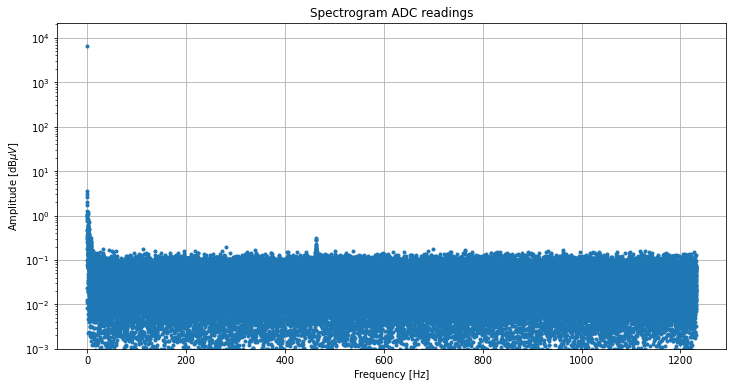

In [102]:
n = data.size
drate = 2463 # fill in the sample rate reported by the rpi_adc_stream command
timestep = 1./drate
freqbins = np.fft.rfftfreq(n, d=timestep)
fourier = np.fft.rfft(data, norm='forward')

fig, axis = plt.subplots(figsize =(12, 6))
#plt.plot(freqbins,20*np.log10(np.abs(fourier.real)), '.')
axis.semilogy(freqbins,np.abs(fourier.real), '.')
axis.set_xlabel('Frequency [Hz]')
axis.set_ylabel('Amplitude [dB$\mu V$]')
axis.set_title(r'Spectrogram ADC readings')
plt.ylim(1e-3,)
#plt.xlim(1150,1250)
plt.grid()
plt.show()    